> # 러시아-우크라 전쟁과 한국 경제
>> #### 네이버신문 크롤링,감성분석과 LDA 토픽 모델링

> ### 크롤링
>> #### 키워드 설정 : 한국 러시아 경제
>> #### 네이버 뉴스에서 전쟁 관련기사 크롤링
>> #### 감성분석을 위해 전쟁 이후 기사와 전쟁 이전 기사 개수를 동일하게 크롤링
>>> #### 전쟁 이후 기사 : 2022.2.24~4.15
>>> #### 전쟁 이전 기사 : 2018.9.11~2019.4.15
>>>> ##### 코로나 이전의 기사

>> #### 동일한 크롤러에 쿼리스트링 범위만 바꿔 전쟁 이전과 이후 기사 크롤링

In [ ]:
# 쿼리스트링 범위만 바꿔서 사태이전과 이후 크롤링
def articlesAdrsLstGen(keywords):
  adrs_lst = []

  for page in tqdm(range(1, 3002, 10)):
    try:
      if len(adrs_lst) == 1100:
        break
      else:
        headers = {
            'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.75 Safari/537.36',
        }
        url = 'https://search.naver.com/search.naver?'
        qs = 'where=news&sm=tab_pge&query=러시아%20한국%20경제&sort=1&photo=0&field=0&pd=0&ds=&de=&cluster_rank=54&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:all,a:all&start=1'  
        params = dict(parse.parse_qsl(qs))
        params['cluster_rank'] = ''
        params['query'] = keywords
        params['start'] = page
        resp = requests.get(url, headers=headers, params=params)
        soup = BeautifulSoup(resp.content, 'lxml')
        adrs = soup.select('div.news_info > div.info_group > a')
        for item in adrs:
          if len(adrs_lst) == 1100:
            break
          elif 'https://news.naver.com/main/read.naver?' in item['href'] and item['href'] not in adrs_lst:
            adrs_lst.append(item['href'])
    except Exception as e:
      print()
      print(e)
      print(item['href'])
      continue
  return adrs_lst

# 'div.news_wrap.api_ani_send > div > div.news_info > div.info_group > a
# '#sp_nws45 > div.news_wrap.api_ani_send > div > div.news_info > div.info_group > a:nth-child(3)'
# '#sp_nws50 > div > div > div.news_info > div.info_group > a:nth-child(3)'

def articlesTableGen(adrs_lst):
  articles = {
    '등록일시': [],
    '제목': [],
    '내용': [],
    '주소': [],
  }

  for adrs in tqdm(adrs_lst):
    if len(articles['제목']) == 1000:
      break
    else:
      try:
        headers = {
            'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.75 Safari/537.36',
        }
        url = adrs
        resp = requests.get(url, headers=headers)
        soup = BeautifulSoup(resp.content, 'lxml')
        get_title = soup.select('#articleTitle')
        get_time = soup.select('#main_content > div.article_header > div.article_info > div > span.t11')
        get_content = soup.select('#articleBodyContents')
        articles['등록일시'].append(get_time[0].text)
        articles['제목'].append(get_title[0].text)
        articles['내용'].append(get_content[0].text)
        articles['주소'].append(adrs)
      except Exception as e:
        print()
        print(e)
        print('오류주소', adrs)
        continue
  table = pd.DataFrame(articles)
  return table


In [ ]:
lst = articlesAdrsLstGen('러시아 한국 경제')

 64%|██████▍   | 194/301 [04:14<02:20,  1.31s/it]


In [ ]:
df = articlesTableGen(lst)

 91%|█████████ | 1000/1100 [09:35<00:57,  1.74it/s]


In [ ]:
df

,등록일시,제목,내용,주소
0,2022.04.14. 오전 11:38,수입 곡물 가격 상승 우려에 사료株 '고공행진',\n\n\n\n\n// flash 오류를 우회하기 위한 함수 추가\nfunction...,https://news.naver.com/main/read.naver?mode=LS...
1,2022.04.14. 오전 11:37,"""韓기준금리 2.86%까지 오를 수도…가구당 이자 345만원 증가""",\n\n\n\n\n// flash 오류를 우회하기 위한 함수 추가\nfunction...,https://news.naver.com/main/read.naver?mode=LS...
2,2022.04.14. 오전 11:33,한경연 “美 금리 동조 시 韓 기준금리 2.86%까지 인상”,\n\n\n\n\n// flash 오류를 우회하기 위한 함수 추가\nfunction...,https://news.naver.com/main/read.naver?mode=LS...
3,2022.04.14. 오전 11:28,"""美 FOMC 빅스텝 예고…국내 기준금리 2.86%까지 상승 전망""",\n\n\n\n\n// flash 오류를 우회하기 위한 함수 추가\nfunction...,https://news.naver.com/main/read.naver?mode=LS...
4,2022.04.14. 오전 11:20,물가·부채·성장 ‘세마리 토끼잡기’ 전속력 질주,\n\n\n\n\n// flash 오류를 우회하기 위한 함수 추가\nfunction...,https://news.naver.com/main/read.naver?mode=LS...
...,...,...,...,...
995,2022.03.06. 오후 4:12,한국 경제 ‘저성장-고물가’ 심화 우려···“스태그플레이션도 배제 못해”,\n\n\n\n\n// flash 오류를 우회하기 위한 함수 추가\nfunction...,https://news.naver.com/main/read.naver?mode=LS...
996,2022.03.06. 오후 3:27,금 2298.5t 쟁여둔 러시아...'금융핵폭탄'에도 '믿는구석' 있었다,\n\n\n\n\n// flash 오류를 우회하기 위한 함수 추가\nfunction...,https://news.naver.com/main/read.naver?mode=LS...
997,2022.03.06. 오후 3:23,"""우크라 충격…韓경제 경기 재침체 가능성""",\n\n\n\n\n// flash 오류를 우회하기 위한 함수 추가\nfunction...,https://news.naver.com/main/read.naver?mode=LS...
998,2022.03.06. 오후 1:18,우크라發 물가 충격 이달부터 현실화…스태그플레이션 우려,\n\n\n\n\n// flash 오류를 우회하기 위한 함수 추가\nfunction...,https://news.naver.com/main/read.naver?mode=LS...


> ### 전처리
>> #### 감성분석을 위해 이전 데이터에 1, 이후 데이터에 0 라벨링
>> #### 이전과 이후 데이터 전처리
>> #### 데이터 통합

>>> #### 라벨링

In [ ]:
#@title
af = pd.read_csv('러시아 한국 경제_v2_2022041520220224.csv')
be = pd.read_csv('러시아 한국 경제_v2_2019041520180911.csv')
af['label'] = 0
be['label'] = 1

>>> #### 전처리

In [ ]:
#@title
def clean_content(content):
  stripped = content[69:-2]
  cleaned = re.sub('[^가-힣ㄱ-ㅣa-zA-Z|0-9.%]', ' ', string=stripped)
  return cleaned

def clean_title(title):
  cleaned = re.sub('[^가-힣ㄱ-ㅣa-zA-Z|0-9.%]', ' ', string=title)
  return cleaned

In [ ]:
#@title
af['내용'] = af['내용'].apply(clean_content)
af['제목'] = af['제목'].apply(clean_title) + '.'
af['제목내용'] = af['제목'] + ' ' + af['내용']
be['내용'] = be['내용'].apply(clean_content)
be['제목'] = be['제목'].apply(clean_title) + '.'
be['제목내용'] = be['제목'] + ' ' + be['내용']

>>> #### 데이터통합

In [ ]:
#@title
total = pd.concat([be] + [af])

In [ ]:
#@title
total = total.reset_index()

In [ ]:
#@title
len(total)

2912

> ### Text Rank
>> #### gensim.summerization

In [ ]:
from gensim.summarization.summarizer import summarize
from gensim.summarization import keywords

In [ ]:
doc = ''.join(df['제목내용'].iloc[0])
doc

' 오늘 점심 칼국수 어때   이런말 못하겠네 서울서 8000원 첫 돌파. 우크라 사태로 밀 가격 고공행진밀 선물가격 1년 전  75.8% 칼국수  매경DB  서울에서 대표적 서민음식인 칼국수 평균 가격이 8000원 선을 처음으로 넘어섰다.  러시아의 우크라이나 침공 사태와 해상운임 상승 등이 겹치면서 밀 가격이 급등한 탓이다.14일 한국농촌경제연구원의 해외곡물시장정보에 따르면 지난 12일 기준 시카고선물거래소의 밀 선물 가격은 t당 405.55달러로 1년 전 230.75달러  대비 75.8% 급등했다. 지난달 7일에는 475.46달러까지 치솟아 1년 전 대비 거의 두 배를 기록했다.러시아와 우크라이나는 세계 밀 수출량의 약 29%를 차지하고 있다. 러시아는 세계 최대 밀 수출국이며  우크라이나는  유럽의 빵 바구니 로도 불린다.밀 가격 급등으로 밀가루를 사용하는 외식 물가의 부담도 커지고 있다. 한국소비자원 가격정보 종합포털  참가격 을 보면 지난달 서울 지역의 칼국수 평균 가격은 1년 전보다 8.7% 올라 8113원이다. 서울 지역 칼국수 가격이 8000원을 넘은 것은 이번이 처음이다. 지난달에는 7962원으로 8000원에 육박했다. 자료   한국소비자원 참가격  밀가루를 사용하는 냉면이나 자장면도 다른 외식 품목보다 많이 올랐다. 지난달 서울 지역 냉면 가격은 9962원으로 지난해 같은 달보다 9.7% 올랐고  자장면은 5846원으로 9.4% 상승했다. 같은 기간 비빔밥 7.0% 은 물론  김치찌개백반 5.7%   김밥 5.2%   삼겹살 3.5% . 삼계탕 0.3%  등 안오른 품목이 없지만  칼국수나 냉면에 비해서는 상대적으로 낮은 상승률을 보였다.서울 지역 냉면 가격은 곧 1만원 선을 넘을 것으로 보인다. 이미 유명 평양냉면집들의 냉면 한 그릇은 1만1000 1만5000원에 판매되고 있다.한국농촌경제연구원은  우크라이나 사태에 따른 곡물 국제가격 상승으로 단기적 대체 원산지 개발과 국내 물가 영향 최소화를 위한 금융 및 세제 지원을 강화해야 한다 면

In [ ]:
# 텍스트랭크 코드

from gensim.summarization import summarize

for idx in range(len(df['제목내용'])):
  try:
    df['제목내용'].iloc[idx] = summarize(df['제목내용'].iloc[idx], ratio=0.5)
  except Exception as e:
    print(idx)
    print(e)

336
input must have more than one sentence
599
input must have more than one sentence
890
input must have more than one sentence
945
input must have more than one sentence
1042
input must have more than one sentence
1095
input must have more than one sentence
1190
input must have more than one sentence
1236
input must have more than one sentence
1291
input must have more than one sentence
1342
input must have more than one sentence
1403
input must have more than one sentence


In [ ]:
df['제목내용'][0]

'러시아의 우크라이나 침공 사태와 해상운임 상승 등이 겹치면서 밀 가격이 급등한 탓이다.14일 한국농촌경제연구원의 해외곡물시장정보에 따르면 지난 12일 기준 시카고선물거래소의 밀 선물 가격은 t당 405.55달러로 1년 전 230.75달러  대비 75.8% 급등했다.\n러시아는 세계 최대 밀 수출국이며  우크라이나는  유럽의 빵 바구니 로도 불린다.밀 가격 급등으로 밀가루를 사용하는 외식 물가의 부담도 커지고 있다.\n한국소비자원 가격정보 종합포털  참가격 을 보면 지난달 서울 지역의 칼국수 평균 가격은 1년 전보다 8.7% 올라 8113원이다.\n서울 지역 칼국수 가격이 8000원을 넘은 것은 이번이 처음이다.\n자료   한국소비자원 참가격  밀가루를 사용하는 냉면이나 자장면도 다른 외식 품목보다 많이 올랐다.\n지난달 서울 지역 냉면 가격은 9962원으로 지난해 같은 달보다 9.7% 올랐고  자장면은 5846원으로 9.4% 상승했다.'

> ### 단어 사전 생성
>> #### stop_words
>> #### Komoran 사용자 사전

>> #### 사용자 사전 추가 & 토큰화

In [ ]:
#@title
kmr = Komoran(userdic='user_dictionary.txt')

In [ ]:
#@title
preprocessed = df['제목내용'].apply(kmr.nouns)

>> #### stop_words

In [ ]:
with open('stopwords.pickle', 'rb') as f:
  stopwords = pickle.load(f)
with open('news_lst.pickle', 'rb') as f:
  news_lst = pickle.load(f)

more_sw = [
           '정은',
           '정부',
           '일보',
           '유사점',
           '소우',
           '권위',
           '인텔리전스',
           '피켓',
           '회장',
           '결',
           '김화영',
           '벡스',
           '유승준',
           '최경영',
           '현수',
           '소프',
           '경식',
           '입찰'
           '다운로드',
           '스토어',
           '유닛',
           '극동방송',
           '석관',
           '스트리트',
]
stopwords.extend(news_lst)
stopwords.extend(more_sw)

In [ ]:
# 불용어 삭제 함수

def sw_rmv(row):
  lst = []
  for el in row:
    if el not in stopwords:
      lst.append(el)
  return lst

In [ ]:
preprocessed = preprocessed.apply(sw_rmv)
preprocessed

0       [오늘, 점심, 칼국수, 서울, 돌파, 우크라, 사태, 가격, 고공, 행진, 선물,...
1       [우크라, 전쟁, 장기, 농업, 강세, 국제, 곡물, 분기, 상승, 현대, 사료, ...
2       [식량, 자급, 내년, 농촌, 경제, 전망, 농지, 감소, 생산, 기반, 약화, 식...
3       [윤석열, 당선, 경제, 복합, 위기, 징후, 경기, 둔화, 물가, 대책, 주문, ...
4       [동맹, 바탕, 유럽, 아시아, 외교, 확장, 당선, 외신, 인터뷰, 쿼드, 실무,...
                              ...                        
1451    [전국, 신문, 톱뉴스, 조간, 제재, 대화, 문도, 자랑, 여권, 공격, 매일일보...
1452    [조간, 브리핑, 신용, 대출, 금리, 고금리, 부담, 시작, 경제와이드 모닝벨, ...
1453    [러시아, 전면, 침공, 기준, 금리, 전망, 글로벌, 마켓, 앵커, 오늘, 미국,...
1454    [국제, 유가, 한국, 성장, 우크라, 사태, 전망, 전제, 러시아, 우크라, 침공...
1455    [우크라, 리스크, 원유, 수입, 한국, 문제, 에너지, 러시아, 우크라, 침공, ...
Name: 제목내용, Length: 1456, dtype: object

>> #### user_dicttionary.txt

In [ ]:
#@title
# 우크라사태
# 우크라

# 젤렌스키
# 볼로디미르 젤렌스키
# 데니소바
# 류드밀라 데니소바
# 커비
# 존 커비
# 로버츠
# 케빈 로버츠
# 펜스
# 마이클 펜스
# 아브라모비치
# 로만 아브라모비치
# 캔디
# 닉 캔디
# 크룩스
# 콜린 크룩스

# 루비우
# 돈바스
# 키이우
# 키예프
# 체르니히우
# 루츠크
# 이바노프란키우시크
# 하르키우
# 드니프로
# 크라마토르스크
# 자포리지아
# 미콜라이우
# 오데사
# 헤르손
# 마리우폴
# 크림반도
# 몰도바
# 벨라루스

# 정철동
# 차경식

# 방위산업
# 한화디펜스
# 한화에어로스페이스

# K-9
# K-2

# 해양수산
# 해상운임

# 대통령후보
# 대통령 후보

# 윤당선인
# 윤 당선인

# 크리스피 크림
# 크리스피

# LG컨소시엄

# 라씨로
# 라씨

>>> #### 토큰화 체크

In [ ]:
kmr.nouns('정철동')

['정철동']

> ### 감성분석 모델링
>> #### 학습용과 검증용 데이터 분리, 토큰화
>> #### Logistic Regression


>>> #### 학습용과 검증용 데이터 분리

In [ ]:
#@title
test = total[(total['index'] <= 300)] # 검증용 데이터 인덱스 300이하로 수집 및 분리 후

In [ ]:
#@title
train1 = total[(total['index'] < 300)].index # 통합 데이터에서 검증용 데이터 삭제
train = total.drop(train1)

In [ ]:
from konlpy.tag import Okt 
okt = Okt()

print(okt.morphs(X_train[0])) # 모든 품사 반환 (형태소 토큰화)
print(okt.nouns(X_train[0])) # 명사만 반환
print(okt.pos(X_train[0])) # 품사 태깅

['한국', '전쟁', '수행', '능력', '일본', '을', '앞섰다', '.', '정욱식', '칼럼', '경제력', '차이', '3', '배', '국방', '예산', '과도', '하다는', '증거', '정욱식', '평화', '네트워크', '대표', '군사력', '측정', '전', '문', '기관', '인', '글로벌', '파이어', '파워', 'GFP', '가', '2018년', '잠재', '적', '인', '전쟁', '수행', '능력', '에서', '한국', '이', '일본', '을', '앞섰다는', '평가', '를', '내놨다', '.', '한국', '을', '136', '개', '평가', '대', '상국', '가운데', '7', '위로', '평가', '한', '반면', '일본', '은', '8', '위', '를', '기록', '했다는', '것', '이다', '.', '이', '기관', '이', '한국', '의', '전쟁', '수행', '능력', '을', '일본', '보다', '높게', '평가', '한', '것', '은', '2006년', '이래', '처음', '이다', '.', 'GFP', '는', '군사력', '의', '양', '과', '질적', '측면', '뿐', '만', '아니라', '자원', '재정', '지리', '산업', '등', '55', '개', '요소', '로', '해당', '국가', '의', '전쟁', '수행', '능력', '을', '평가', '해왔다', '.', '하지만', '핵무기', '보유', '고', '는', '중요한', '요소', '에', '포함', '시키지', '않았다', '.', '재래식', '군사력', '을', '동원', '한', '전쟁', '수행', '능력', '을', '주된', '평가', '대상', '으로', '삼았기', '때문', '이다', '.', '이', '에', '따라', '비공식', '핵보유국', '들', '인', '이스라엘', '파키스탄', '북한', '의', '전쟁', '수행', '능력', '은', '각

In [ ]:
#@title
x_train

0       [한국, 전쟁, 수행, 능력, 일본, 정욱식, 칼럼, 경제력, 차이, 국방, 예산,...
1       [기업, 대주주, 의결권, 헤지, 펀드, 기업지배구조, 소버린, 엘리엇, 사태, 무...
2       [산업, 연구원, 극동, 경협, 추진, 준비, 한반도, 평화, 정착, 과정, 협력,...
3       [올림픽, 금메달, 포니, 박항서, 기적, 베트남, 완성, 양정모, 레슬링, 금메달...
4       [댓글, 아세안, 김현철, 경제, 보좌관, 정부, 대외, 경제, 정책, 밑그림, 핵...
                              ...                        
2307    [전국, 주요, 신문, 톱뉴스, 조간, 경향신문, 본격, 제재, 대화, 국민, 일보...
2308    [조간, 브리핑, 고신, 용자, 대출, 금리, 본격, 고금리, 부담, 시작, 경제,...
2309    [러시아, 전면, 침공, 가능, 기준, 금리, 전망, 글로벌, 마켓, 앵커, 미국,...
2310    [국제, 유가, 장중, 한국, 성장, 빨간불, 우크라, 사태, 전망, 전제, 러시아...
2311    [우크라, 리스크, 원유, 수입, 한국, 문제, 에너지, 러시아, 우크라, 침공, ...
Name: 제목내용, Length: 2312, dtype: object

In [ ]:
#@title
x_test

0       [정운찬, 칼럼, 나라, 국립, 현충원, 목련, 자태, 홍매화, 핏빛, 호국, 영령...
1       [자본, 북미, 셰일가스, 투자, 기회, 글로벌, 에너지, 퍼스트, 리저브, 알렉스...
2       [중앙아시아, 중심, 카자흐스탄, 기계, 인프라, 서비스, 경제, 협력, 유망, 한...
3       [김대성, 환율, 이야기, 노르웨이, 국부, 펀드, 한국, 채권, 배제, 교훈, 자...
4       [베네수엘라, 아르, 그리스, 경제, 파탄, 국가, 부채, 사상, 최대, 선심, 복...
                              ...                        
1752    [원투, 펀치, 한국, 경제, 올해, 성장률, 달성, 대외, 의존, 역대, 충격, ...
1753    [경험, 나미, 우크라, 전쟁, 상하, 이항, 봉쇄, 원자재, 식량, 수입, 물가,...
1754    [승승장구, 방산, 주가, 기자, 영하, 노르웨이, 설원, 국산, 전차, 안정, 방...
1755    [항공편, 완전, 회복, 앵커, 다음, 코로나, 국제선, 하늘길, 본격, 항공업, ...
1756    [물가, 상승, 상향, 우크라, 사태, 글로벌, 인플레, 영향, 긴축, 확대, 발표...
Name: 제목내용, Length: 602, dtype: object

>>> #### Logistic Regression

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

#okt.nouns를 tokenizer로 이용
tfidf = TfidfVectorizer(tokenizer=okt.nouns, max_features=2000, min_df=5, max_df=0.5) 

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

clf = LogisticRegression(max_iter=1000) 
clf.fit(X_train_tfidf, y_train) 
print('#Train set score: {:.3f}'.format(clf.score(X_train_tfidf, y_train))) 
print('#Test set score: {:.3f}'.format(clf.score(X_test_tfidf, y_test))) 

#Train set score: 0.987
#Test set score: 0.963


> ### Topic Modeling
>> #### Trigram
>> #### Bag of Words 생성
>> #### LDA 토픽 3개
>> #### 최적 에폭(passes)와 토픽 갯수 찾기
>> #### random_state 고정 후 사용자 사전 및 불용어 사전 업데이트

>>> #### Trigram



In [ ]:
def to_trigrams(row):
  bigram = gensim.models.Phrases(row, delimiter=b' ')
  trigram = gensim.models.Phrases(bigram[row], delimiter=b' ')  
  bigram_mod = gensim.models.phrases.Phraser(bigram)
  trigram_mod = gensim.models.phrases.Phraser(trigram)
  new_row = bigram_mod[row]
  new_row = trigram_mod[bigram_mod[row]]
  
  return new_row

In [ ]:
preprocessed = preprocessed.apply(to_trigrams)

>>> #### Bag of Words 생성

In [ ]:
dictionary = gensim.corpora.Dictionary(preprocessed) # 토큰별 아이디 부여

In [ ]:
corpus = [dictionary.doc2bow(doc, allow_update=True) for doc in preprocessed] # BoW Corpus 생성

In [ ]:
tfidf = gensim.models.TfidfModel(corpus, smartirs='ntc') # TF*IDF 생성

>>> #### LDA 토픽 3개

In [ ]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [ ]:
font_path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'

In [ ]:
random_state = np.random.RandomState(100) # random_state 테스트
random_state.random(4)

array([0.54340494, 0.27836939, 0.42451759, 0.84477613])

>>> #### 최적 에폭(passes)와 토픽 갯수 찾기

In [ ]:
 # to find optinal passes(epochs)
 from gensim.models.coherencemodel import CoherenceModel
 num_topics = 4
 chunksize = 2000
 passes = 20
 iterations = 400
 eval_every = None
 random_state = 100
 coherences=[]
 perplexities=[]
 passes_lst=[]
 for i in range(10):
     if i==0:
         passes=1
     else:
         passes=i*5
     tic = time()
     lda_model = gensim.models.ldamodel.LdaModel(corpus=tfidf[corpus],
                                                 id2word=dictionary,
                                                 num_topics=num_topics,
                                                 chunksize=chunksize,
                                                 passes=passes,
                                                 iterations=iterations,
                                                 random_state=random_state,
                                                 eval_every=eval_every,)
     print(f'epoch: {passes} {time()}')
     cm = CoherenceModel(model=lda_model, corpus=corpus, coherence='u_mass')
     coherence = cm.get_coherence()
     perplexity = lda_model.log_perplexity(corpus)
     coherences.append(coherence)
     perplexities.append(perplexity)
     print(f'Coherence: {coherence}')
     print(f'Perplexity: {perplexity}')

In [ ]:
# 트라이그램 사용자 사전 없고 불용어는 신문사명이랑 324개 기초만
# 'epoch: 40 1650354702.8733625'
# 'Coherence: -7.95634932266013'
# 'Perplexity: -8.229182282166434'

In [ ]:
# to find optimal num_topicscoherencesT = []
perplexitiesT = []
passes = 15for i in range(1, 11):
    num_topics = i * 2
    tic = time()
    lda_models = gensim.models.ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=num_topics, iterations=400, passes=passes)
    print(f'num_topics: {num_topics} {time()}')    cm = CoherenceModel(model=lda_models, corpus=corpus, coherence='u_mass')
    coherence = cm.get_coherence()
    perplexity = lda_models.log_perplexity(corpus)
    coherencesT.append(coherence)
    perplexitiesT.append(perplexity)
    print(f'coherence: {coherence}')
    print(f'perplexity: {perplexity}')

In [ ]:
# 'num_topics: 4 1650341409.307819'
# 'coherence: -0.7880039420247344'
# 'perplexity: -7.44461009050456'

>>> #### random_state고정후 사용자 사전과 불용어 사전 업데이트

In [ ]:
num_topics = 4 # 토픽 수 설정
chunksize = 2000 # 한번에 처리할 row 수 설정
passes = 40 # 에폭 Number of passes through the corpus during training.
iterations = 400 # Maximum number of iterations through the corpus when inferring the topic distribution of a corpus.
eval_every = None # log 복잡도 계산 수행 유무 설정 1로 설정하면 학습이 2배로 느려짐
random_state = 100 # 재실행 시 같은 결과를 같기 위해 난수 설정

lda_model = gensim.models.ldamodel.LdaModel(corpus=tfidf[corpus],
                                            id2word=dictionary,
                                            num_topics=num_topics,
                                            chunksize=chunksize,
                                            passes=passes,
                                            iterations=iterations,
                                            random_state=random_state,
                                            eval_every=eval_every,)

In [ ]:
print(lda_model.print_topics())

[(0,
  '0.001*"도넛" + 0.000*"크리스피" + 0.000*"커피" + 0.000*"아이스크림" + 0.000*"엑스포" + '
  '0.000*"롯데제과" + 0.000*"특허" + 0.000*"던킨" + 0.000*"출원" + 0.000*"빼빼로"'),
 (1,
  '0.003*"물가" + 0.003*"금리" + 0.002*"곡물" + 0.002*"가격" + 0.002*"상승" + 0.002*"유가" '
  '+ 0.002*"수입" + 0.002*"분기" + 0.002*"인상" + 0.002*"제재"'),
 (2,
  '0.000*"발레" + 0.000*"직항" + 0.000*"발레단" + 0.000*"이완용" + 0.000*"누에" + '
  '0.000*"펩트론" + 0.000*"무용수" + 0.000*"양잠" + 0.000*"치료제" + 0.000*"볼쇼이"'),
 (3,
  '0.001*"헤리티지 재단" + 0.001*"동해항" + 0.000*"케빈 로버츠" + 0.000*"미용" + 0.000*"펜스" + '
  '0.000*"피터 로빈슨" + 0.000*"김재연" + 0.000*"금융결제원" + 0.000*"방산" + 0.000*"비지니스"')]


> ### 시각화
>> #### WordCloud
>> #### LDA 시각화

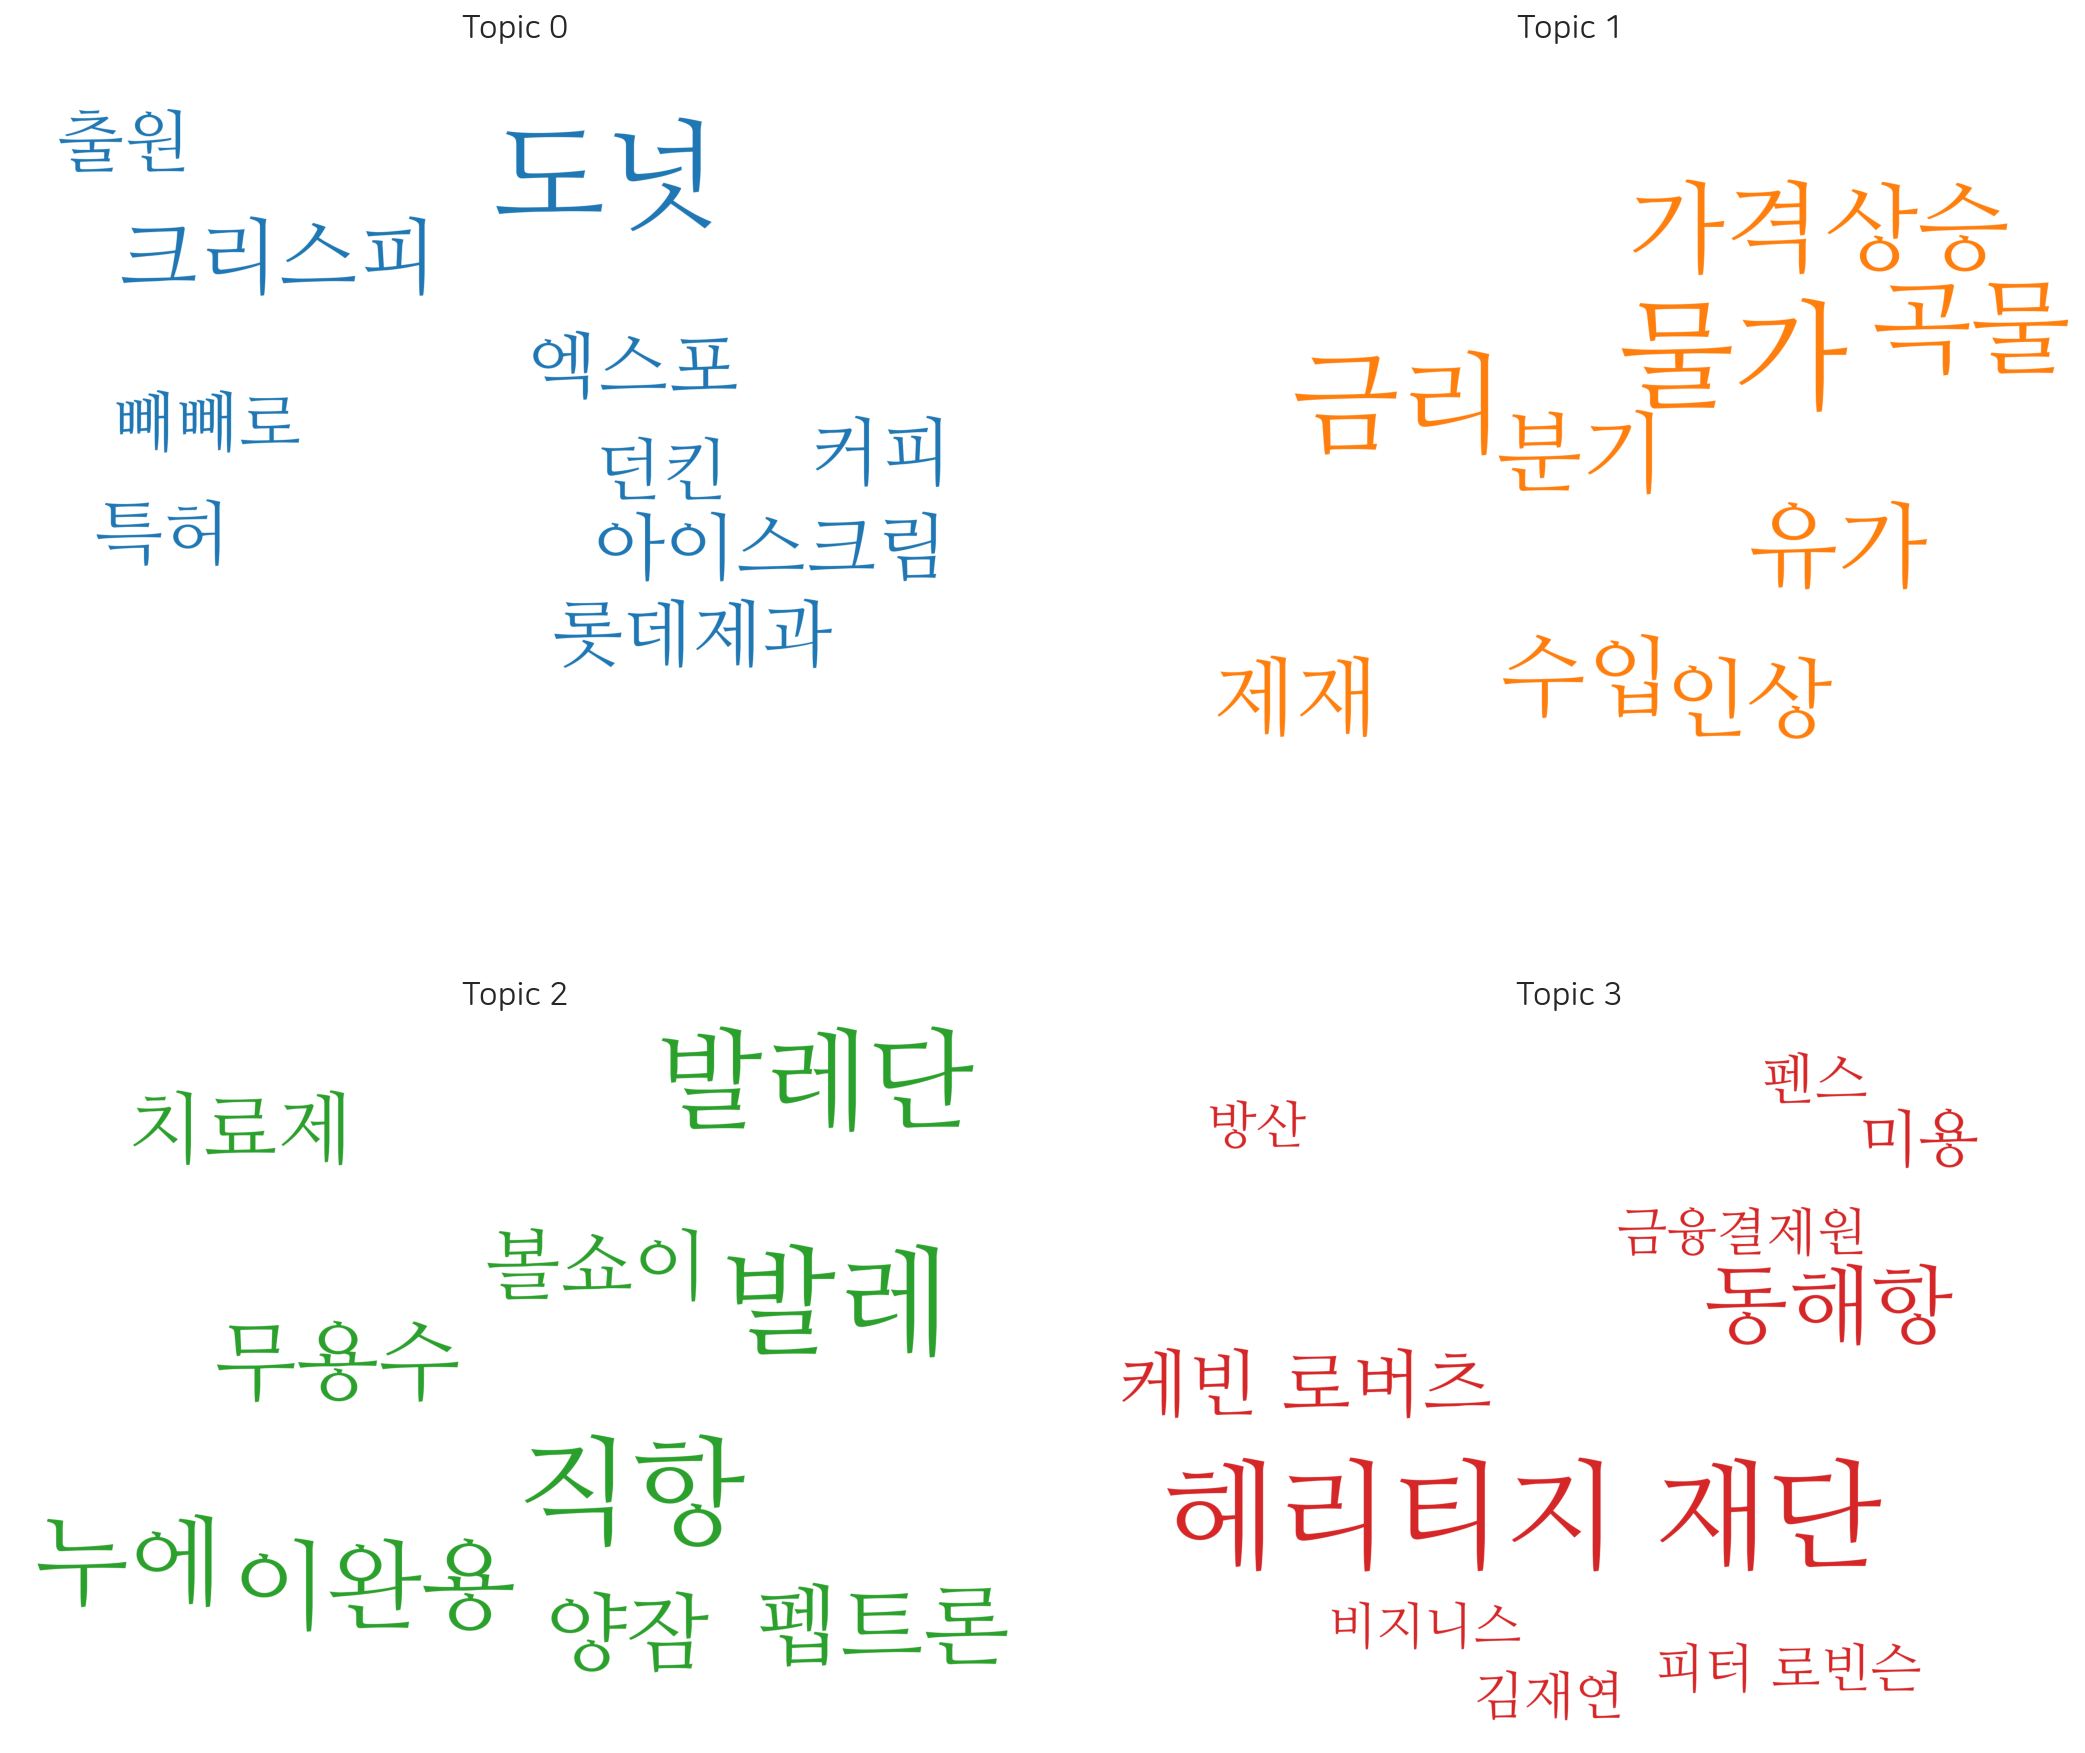

In [ ]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0,
                  font_path=font_path)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(15,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, tfidf[corpus], dictionary=lda_model.id2word)
vis

PreparedData(topic_coordinates=              x             y  topics  cluster       Freq
topic                                                    
1      0.115628 -6.144688e-07       1        1  92.356036
0     -0.038559  6.812912e-04       2        1   2.554090
3     -0.038648 -8.300635e-04       3        1   2.549601
2     -0.038420  1.493868e-04       4        1   2.540273, topic_info=          Term      Freq     Total Category  logprob  loglift
1370   헤리티지 재단  0.000000  0.000000  Default  30.0000  30.0000
1535        커피  0.000000  0.000000  Default  29.0000  29.0000
9390       동해항  0.000000  0.000000  Default  28.0000  28.0000
8246        난민  5.000000  5.000000  Default  27.0000  27.0000
5176        매일  2.000000  2.000000  Default  26.0000  26.0000
...        ...       ...       ...      ...      ...      ...
10638       투어  0.033221  0.349568   Topic4  -9.2623   1.3194
9533        스키  0.034019  0.475475   Topic4  -9.2385   1.0355
4152        이주  0.035944  0.861868   Topic4  -9.1835   0.4958
8246        난민  0.038162  5.314828   Topic4  -9.1236  -1.2635
3177        승객  0.033349  0.900413   Topic4  -9.2584   0.3771

[173 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1         1  1.013084        가격
266       1  0.973216        경기
3101      1  0.948570        경남
1341      1  0.886814        경총
6         1  1.003295        곡물
...     ...       ...       ...
1535      1  1.041965        커피
8686      1  1.036993        크림
1369      1  0.947151  한국경영자총협회
385       1  0.997912        환율
1177      1  0.984698        후보

[65 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 4, 3])

> ### 어려웠던거 , 힘들었던거
>> #### 한국어 형태소 분류
>> #### LDA random_state
>> #### 사용자 사전생성
>>> #### 감성분석 모델 테스트

In [ ]:
from konlpy.tag import Okt #새로운 데이터셋 전처리 과정

def text_preprocessing(doc):
  tokenizer = Okt()

  token_tagged = tokenizer.pos(doc)

  nouns = [s for s, t in token_tagged if t in ['Noun'] and len(s) > 1]

#   preprocessed = ' '.join(nouns) 위의 방식으로 함수를 실행할 시 나오는 결과값은 문자열의 형태로 반환됨 
#   return preprocessed
  return nouns # 그러나 nouns로 리턴하면 리스트의 형태로 반환 되므로 


In [ ]:
MAX_LENGTH = 100 # 문장 개수 
sentence = input("감성분석할 기사를 입력해 주세요: ")
sentence = text_cleaning(sentence)
sentence = text_preprocessing(sentence)

# tokenizer.fit_on_texts(sentence)
sequences = tokenizer.texts_to_sequences([sentence])
pad_new = pad_sequences(sequences, maxlen = MAX_LENGTH)


감성분석할 기사를 입력해 주세요: word_vocab2


위에서 훈련데이터로 word_vocab의 (문자: 시퀀스 숫자)를 만들었는데
여기서 fit_on_texts를 사용하면 새로운 기사에 반복 적용이 되어
같은 문자임에도 다른 시퀀스 번호를 가지게 되어
훈련데이터로 새로운 기사를 비교할 수 없게 됨.

In [ ]:
word_vocab